In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import itertools
import os

## Dense Coding Scheme

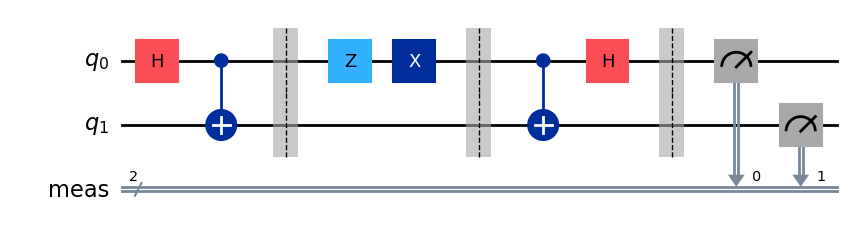

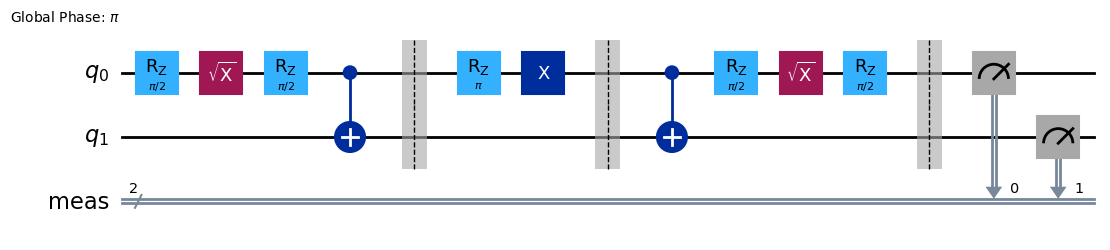

OrderedDict([('rz', 5), ('barrier', 3), ('sx', 2), ('cx', 2), ('measure', 2), ('x', 1)])
11


In [6]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)               #Entaglment of Qubits

qc.barrier()
qc.z(0)               
qc.x(0)                  
qc.barrier()              #Encoding can comment to change encoding

qc.cx(0,1)
qc.h(0)
qc.measure_all()

display(qc.draw('mpl'))

transpiled = transpile(qc, basis_gates=['rz', 'sx', 'x', 'cx'], optimization_level=3)
display(transpiled.draw('mpl'))
print(transpiled.count_ops())
print(transpiled.depth())

## Measurement

Measurement Counts: {'11': 10000}


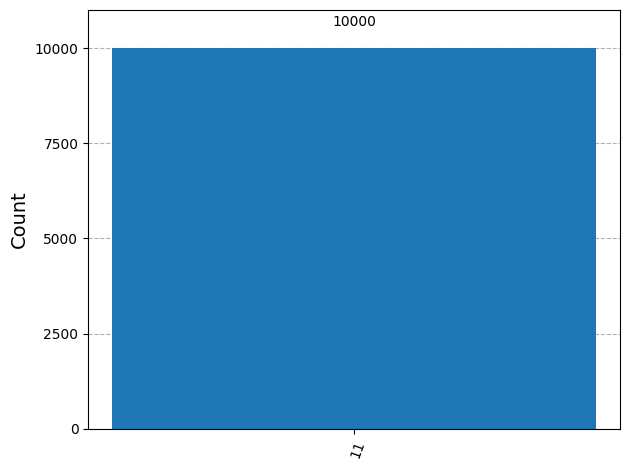

In [7]:

sim = AerSimulator()
tqc = transpile(qc, sim)
result = sim.run(tqc, shots=10000).result()
counts = result.get_counts()

# Show results
print("Measurement Counts:", counts)
plot_histogram(counts)

## Run on Hardware

In [ ]:
your_api_key = os.getenv("API_KEY_IBM")  #API Key Here
your_crn = os.getenv("CRN_IMB")          #CRN Here

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qgss-2025",
    overwrite=True
)

service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()
# Get a backend
backend = service.least_busy(operational=True, simulator=False)
print(f"We are using the {backend.name} quantum computer")
from qiskit_ibm_runtime import Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import generate_preset_pass_manager

service = QiskitRuntimeService(name="qgss-2025")

sampler = Sampler(mode=backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)


job = sampler.run(pm.run([qc2]), shots=10000)

results_sampler = job.result()

counts =results_sampler[0].data.meas.get_counts()
from qiskit.visualization import plot_histogram

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the histogram
plot_histogram(
        counts,
        title='Dense Coding Qubit Qubit',
        color='midnightblue',
        ax=ax
)
    
    # Add custom axis labels
ax.set_xlabel('Messages')
ax.set_ylabel('Counts')
    
    # Display the plot
plt.tight_layout()
display(fig)